In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MD =  pd.read_csv('mcdonalds.csv')

In [3]:
column_names = MD.columns
print(column_names)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
MD.shape

(1453, 15)

In [5]:
MD.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
X = MD.iloc[:, 0:11].replace("Yes",1).replace("No",0)

In [7]:
column_means = np.round(np.mean(X.astype(float), axis=0), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

MD_pca = pca.fit_transform(X) # data after tranforming
MD_p=pca.fit(X)



In [9]:
std_dev = np.round(np.sqrt(pca.explained_variance_), 5)
prop_var = np.round(pca.explained_variance_ratio_, 5)
cum_var = np.round(np.cumsum(prop_var), 5)

In [10]:
# Print the summary of PCA results
print("Importance of components:")
for i in range(len(std_dev)):
    print(f"PC{i+1}", std_dev[i])

print("Proportion of Variance:")
for i in range(len(prop_var)):
    print(f"PC{i+1}", prop_var[i])

print("Cumulative Proportion:")
for i in range(len(cum_var)):
    print(f"PC{i+1}", cum_var[i])

Importance of components:
PC1 0.75705
PC2 0.60746
Proportion of Variance:
PC1 0.29945
PC2 0.1928
Cumulative Proportion:
PC1 0.29945
PC2 0.49225


In [35]:

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T # tranforming because we are converting 
columns=[]
for i in range(11):
    i=i+1
    columns.append("PC{}".format(i))

rot_df = pd.DataFrame([rot_matrix], index=['yummy' 'convenient' 'spicy' 'fattening' 'greasy' 'fast' 'cheap' 'tasty'
 'expensive' 'healthy' 'disgusting' 'Like' 'Age' 'VisitFrequency' 'Gender'], columns=columns)
rot_df=round(-rot_df,3)
rot_df

print(MD_p.components_.T)

ValueError: Must pass 2-d input. shape=(1, 11, 2)

In [12]:
index = MD.columns.values
print(index)

['yummy' 'convenient' 'spicy' 'fattening' 'greasy' 'fast' 'cheap' 'tasty'
 'expensive' 'healthy' 'disgusting' 'Like' 'Age' 'VisitFrequency' 'Gender']


In [33]:
load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T

In [48]:
rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

ValueError: Shape of passed values is (11, 2), indices imply (17, 15)

In [49]:
from sklearn.cluster import KMeans

C:\Users\AYUSH JHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


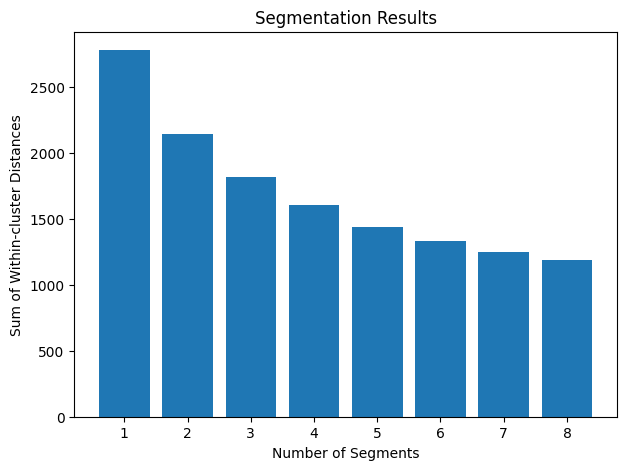

In [50]:
np.random.seed(1234)
nrep = 10
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(X)
    within_cluster_distances.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-cluster Distances")
plt.title("Segmentation Results")
plt.show()

In [51]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [ ]:
np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

In [ ]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(X)
    similarities = MD_km28[str(i)].transform(X).min(axis=1)
    print(i,'similarity:',similarities)
    print(i,'labels:',labels)

    
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0,1.2,1.4])

plt.tight_layout()
plt.show()

In [ ]:
MD_k4 = MD_km28['4']

In [ ]:
from scipy.stats import entropy

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

# Assuming your DataFrame is named 'MD' and contains the columns 'column1', 'column2', ...
for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD[['column1', 'column2', ...]])  # Replace 'column1', 'column2', ... with the actual column names
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)


In [57]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

TypeError: list indices must be integers or slices, not str

In [58]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0   1   2   3
kmeans                  
0        285   8  51  48
1        272   4  70  37
2        229  11  56  54
3        275   0  38  15
kmeans   0   1   2   3
kmeans                
0       21  13  13  11
1       13  11   2  14
2        9   5   8   5
3        8   5   9   7


In [59]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: -0.45924625518097933
Log-likelihood for MD.m4: -1.4765865871267339


In [60]:
like_counts = pd.value_counts(MD['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

4      58
5      59
7      71
6      73
10    143
9     152
0     152
3     160
8     169
1     187
2     229
Name: Like, dtype: int64


In [61]:
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

MD['Like.n'] = MD['Like'].map(like_mapping)


like_n_counts = MD['Like.n'].value_counts()


print(like_n_counts)

Series([], Name: Like.n, dtype: int64)


In [62]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [63]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    MD[x] = LabelEncoder().fit_transform(MD[x])
    return MD

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
MD
df_eleven = MD.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
MD['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(MD['cluster_num'],MD['Like'])
#Reordering cols
MD
crosstab = crosstab[[ 'I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab 
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

KeyError: "None of [Index(['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4',\n       'I love it!+5'],\n      dtype='object', name='Like')] are in the [columns]"

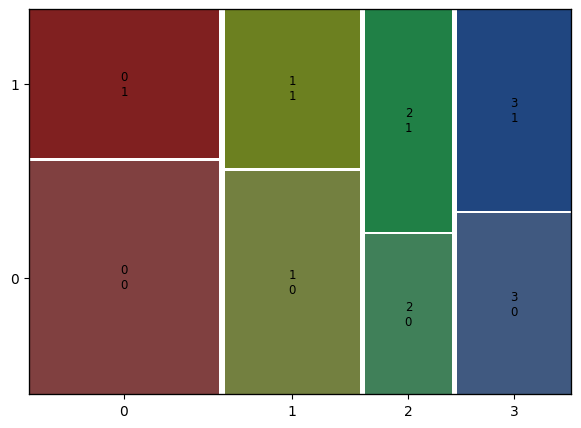

In [64]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, MD['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

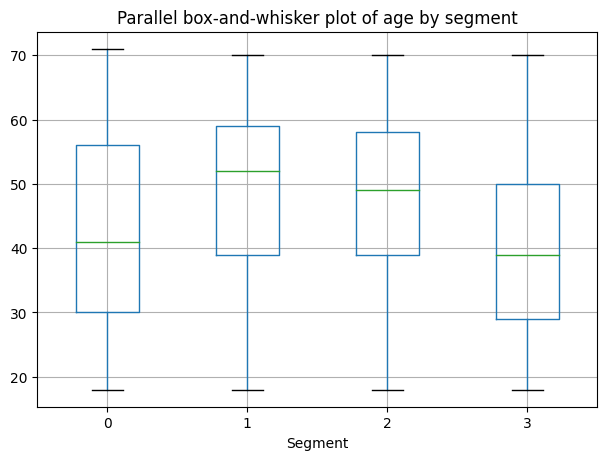

In [65]:
df = pd.DataFrame({'Segment': k4, 'Age': MD['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

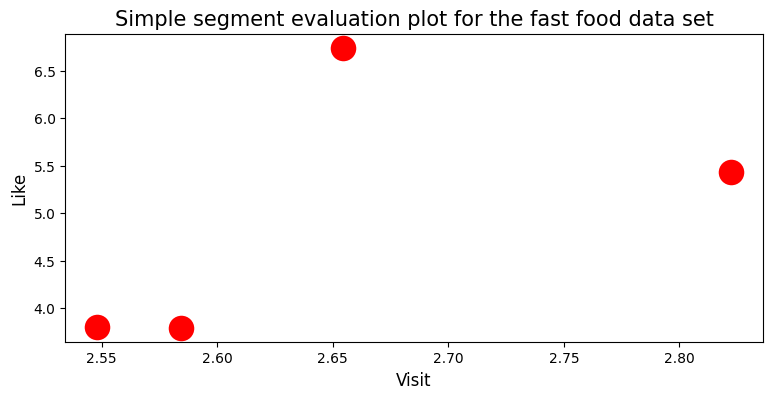

In [66]:
MD['Gender'] = LabelEncoder().fit_transform(MD['Gender'])
Gender = MD.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
MD['Like'] = LabelEncoder().fit_transform(MD['Like'])
Like = MD.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
MD['VisitFrequency'] = LabelEncoder().fit_transform(MD['VisitFrequency'])
visit = MD.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()